In [12]:
#1. Import pandas under the name pd

import pandas as pd

import numpy as np

In [2]:
#2. Print the version of pandas that has been imported.

pd.__version__

'1.4.4'

In [3]:
#3. Print out all the version information of the libraries that are required by the pandas library.

pd.show_versions()


C:\Program Files\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : ca60aab7340d9989d9428e11a51467658190bb6b
python           : 3.10.6.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22621
machine          : AMD64
processor        : AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.1252

pandas           : 1.4.4
numpy            : 1.23.2
pytz             : 2022.2.1
dateutil         : 2.8.2
setuptools       : 63.2.0
pip              : 22.2.2
Cython           : 0.29.28
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.4.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : None
brotli     

In [10]:
#4. Create a DataFrame df from this dictionary data which has the index labels.
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

In [11]:
#5. Display a summary of the basic information about this DataFrame and its data.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [12]:
#6. Return the first 3 rows of the DataFrame df.

df.head(3)



,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [14]:
#7. Select just the 'animal' and 'age' columns from the DataFrame df.


df.loc[:, ['animal', 'age']]


,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [15]:
#8. Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].

df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [16]:
#9. Select only the rows where the number of visits is greater than 3.

df[df['visits'] > 3]

,animal,age,visits,priority


In [17]:
#10. Select the rows where the age is missing, i.e. is NaN.

df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [18]:
#11. Select the rows where the animal is a cat and the age is less than 3.

df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


In [19]:
#12. Select the rows the age is between 2 and 4 (inclusive).

df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [20]:
##13. Change the age in row 'f' to 1.5.

df.loc['f', 'age'] = 1.5

In [21]:
#14. Calculate the sum of all visits (the total number of visits)

df['visits'].sum()

19

In [22]:
#15. Calculate the mean age for each different animal in df.

df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [23]:
#16. Append a new row 'k' to df with your choice of values for each column. Then delete that row to return the original DataFrame.

df.loc['k'] = [5.5, 'dog', 'no', 2]


df = df.drop('k')

In [24]:
#17. Count the number of each type of animal in df.

df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [25]:
#18. Sort df first by the values in the 'age' in decending order, then by the value in the 'visit' column in ascending order.

df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [26]:
#19. The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be True and 'no' should be False.



df['priority'] = df['priority'].map({'yes': True, 'no': False})   

In [28]:
#20. In the 'animal' column, change the 'snake' entries to 'python'.

df['animal'] = df['animal'].replace('snake', 'python')

In [29]:
#21. For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).


df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


In [30]:
#22.You have a DataFrame df with a column 'A' of integers. For example:

df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


In [31]:
#23. Given a DataFrame of numeric values, say

df = pd.DataFrame(np.random.random(size=(5, 3))) 

# a 5x3 frame of float values how do you subtract the row mean from each element in the row?

df.sub(df.mean(axis=1), axis=0)

,0,1,2
0,-0.060591,0.264417,-0.203827
1,0.248337,-0.299721,0.051384
2,0.311513,-0.187889,-0.123625
3,-0.007580,0.122226,-0.114645
4,0.044929,0.012297,-0.057227


In [32]:
#24. Suppose you have DataFrame with 10 columns of real numbers, for example:

df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

#Which column of numbers has the smallest sum? (Find that column's label.)

df.sum().idxmin()


'i'

In [33]:
#25. How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

len(df) - df.duplicated(keep=False).sum()

5

In [35]:
#26. You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the column which contains the third NaN value.

(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

0    a
1    a
2    a
3    a
4    a
dtype: object

In [37]:
#27. A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example:

df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

df.groupby('grps')['vals'].nlargest(3).sum(level=0)

C:\Users\mithu\AppData\Local\Temp\ipykernel_12636\3349493364.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df.groupby('grps')['vals'].nlargest(3).sum(level=0)


grps
a    409
b    156
c    345
Name: vals, dtype: int64

In [7]:
##30. Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations of the 3 largest values.

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

df.unstack().sort_values()[-3:].index.tolist()

[('X', 9), ('X', 6), ('X', 0)]

In [11]:

import pandas as pd

import numpy as np

In [14]:
##33. Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series

dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

In [15]:
##34. Find the sum of the values in s for every Wednesday.

s[s.index.weekday == 2].sum()

26.467912390045097

In [16]:
##35. For each calendar month in s, find the mean of values.

s.resample('M').mean()

2015-01-31    0.382897
2015-02-28    0.506760
2015-03-31    0.577928
2015-04-30    0.434613
2015-05-31    0.520464
2015-06-30    0.528434
2015-07-31    0.578933
2015-08-31    0.493838
2015-09-30    0.528229
2015-10-31    0.471069
2015-11-30    0.539424
2015-12-31    0.477900
Freq: M, dtype: float64

In [19]:
##37. Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [20]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

In [22]:
##38. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)

df['FlightNumber']

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

In [28]:
##39. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
df['From_To']

0        LoNDon_paris
1        MAdrid_miLAN
2    londON_StockhOlm
3      Budapest_PaRis
4     Brussels_londOn
Name: From_To, dtype: object

In [31]:
##40. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp['From']

0      London
1      Madrid
2      London
3    Budapest
4    Brussels
Name: From, dtype: object

In [32]:
##41. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

df = df.drop('From_To', axis=1)
df = df.join(temp)

In [34]:
##42. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.

df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df['Airline']

0                KLM
1         Air France
2    British Airways
3         Air France
4          Swiss Air
Name: Airline, dtype: object

In [35]:
##43. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)

C:\Users\mithu\AppData\Local\Temp\ipykernel_15160\1842247993.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  delays = df['RecentDelays'].apply(pd.Series)


In [37]:
##44. Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)), construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series s.

letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)
print(s)

A  0    0.266343
   1    0.021805
   2    0.741177
   3    0.625192
   4    0.886477
   5    0.603317
   6    0.622176
   7    0.064413
   8    0.016871
   9    0.499875
B  0    0.274979
   1    0.144048
   2    0.812354
   3    0.158203
   4    0.602951
   5    0.382498
   6    0.243685
   7    0.434524
   8    0.716476
   9    0.190094
C  0    0.622866
   1    0.174474
   2    0.748055
   3    0.141839
   4    0.500989
   5    0.330610
   6    0.353488
   7    0.494105
   8    0.752233
   9    0.396369
dtype: float64


In [38]:
##45. Check the index of s is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

s.index.is_lexsorted()

C:\Users\mithu\AppData\Local\Temp\ipykernel_15160\2286347296.py:1: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  s.index.is_lexsorted()


True

In [39]:
##46. Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.

s.loc[:, [1, 3, 6]]

A  1    0.021805
   3    0.625192
   6    0.622176
B  1    0.144048
   3    0.158203
   6    0.243685
C  1    0.174474
   3    0.141839
   6    0.353488
dtype: float64

In [40]:
##47. Slice the Series s; slice up to label 'B' for the first level and from label 5 onwards for the second level.

s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.603317
   6    0.622176
   7    0.064413
   8    0.016871
   9    0.499875
B  5    0.382498
   6    0.243685
   7    0.434524
   8    0.716476
   9    0.190094
dtype: float64

In [41]:
##48. Sum the values in s for each label in the first level (you should have Series giving you a total for labels A, B and C).

s.sum(level=0)

C:\Users\mithu\AppData\Local\Temp\ipykernel_15160\1669125355.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  s.sum(level=0)


A    4.347646
B    3.959810
C    4.515028
dtype: float64

In [42]:
##49. Suppose that sum() (and other methods) did not accept a level keyword argument. How else could you perform the equivalent of s.sum(level=1)?

s.unstack().sum(axis=0)


0    1.164188
1    0.340327
2    2.301586
3    0.925234
4    1.990416
5    1.316425
6    1.219349
7    0.993041
8    1.485580
9    1.086338
dtype: float64

In [43]:
##50. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

new_s = s.swaplevel(0, 1)

# check
new_s.index.is_lexsorted()

# sort
new_s = new_s.sort_index()

C:\Users\mithu\AppData\Local\Temp\ipykernel_15160\3366574853.py:6: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  new_s.index.is_lexsorted()


In [44]:
print(new_s)

0  A    0.266343
   B    0.274979
   C    0.622866
1  A    0.021805
   B    0.144048
   C    0.174474
2  A    0.741177
   B    0.812354
   C    0.748055
3  A    0.625192
   B    0.158203
   C    0.141839
4  A    0.886477
   B    0.602951
   C    0.500989
5  A    0.603317
   B    0.382498
   C    0.330610
6  A    0.622176
   B    0.243685
   C    0.353488
7  A    0.064413
   B    0.434524
   C    0.494105
8  A    0.016871
   B    0.716476
   C    0.752233
9  A    0.499875
   B    0.190094
   C    0.396369
dtype: float64


# 51. 
Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.

X = 5
Y = 4
To begin, generate a DataFrame df with two columns, 'x' and 'y' containing every coordinate for this grid. That is, the DataFrame should start:

   x  y
0  0  0
1  0  1
2  0  2

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

C:\Users\mithu\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='xs', ylabel='ys'>

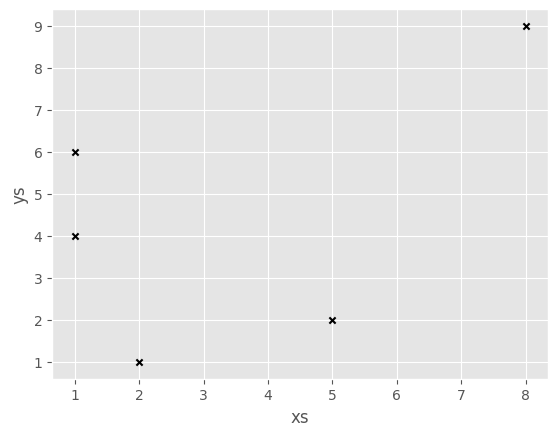

In [49]:
##56. Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df.plot.scatter("xs", "ys", color = "black", marker = "x")

<AxesSubplot: xlabel='hours_in', ylabel='productivity'>

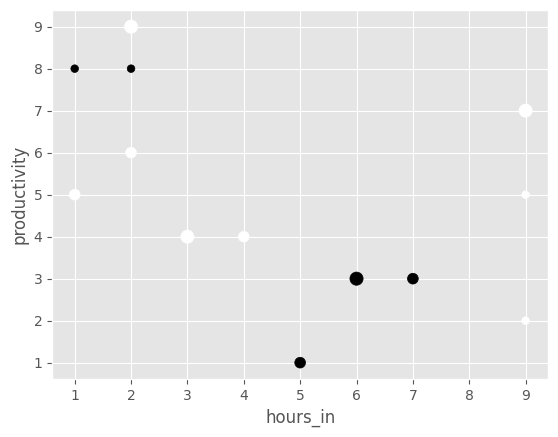

In [50]:
##57. Columns in your DataFrame can also be used to modify colors and sizes. Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning. Make a plot which incorporates all four features of this DataFrame.


df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 30, c = df.caffienated)

(-1.0, 12.0)

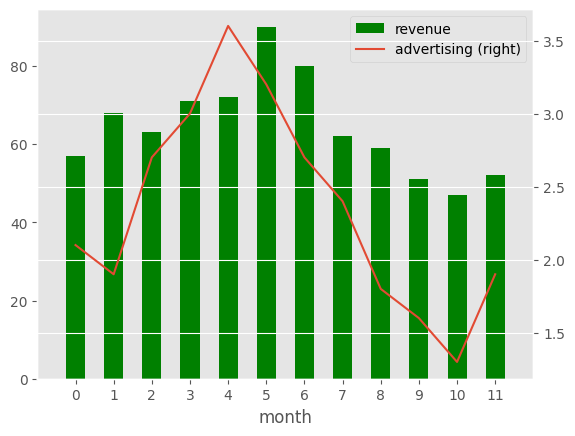

In [51]:
##58. What if we want to plot multiple things? Pandas allows you to pass in a matplotlib Axis object for plots, and plots will also return an Axis object.

##Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))